In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from db import helper as db_helper
from db.models import SpotRate
import pandas as pd

In [2]:
session = db_helper.start_session()

df = pd.read_sql_table('spot_rates', session.bind)

2018-12-27 13:06:45,541 INFO sqlalchemy.engine.base.Engine select version()
2018-12-27 13:06:45,542 INFO sqlalchemy.engine.base.Engine {}
2018-12-27 13:06:45,545 INFO sqlalchemy.engine.base.Engine select current_schema()
2018-12-27 13:06:45,546 INFO sqlalchemy.engine.base.Engine {}
2018-12-27 13:06:45,550 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-12-27 13:06:45,551 INFO sqlalchemy.engine.base.Engine {}
2018-12-27 13:06:45,553 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-12-27 13:06:45,554 INFO sqlalchemy.engine.base.Engine {}
2018-12-27 13:06:45,562 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2018-12-27 13:06:45,564 INFO sqlalchemy.engine.base.Engine {}
2018-12-27 13:06:45,570 INFO sqlalchemy.engine.base.Engine SELECT c.relname FROM pg_class c JOIN pg_namespace n ON n.oid = c.relnamespace WHERE n.nspname = %(schema)s AND c.relkind = 'r'
2018-12-27 13:

2018-12-27 13:06:45,690 INFO sqlalchemy.engine.base.Engine {}


/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
# Quick snapshot of the data
df.describe()

# lack of significant data in the 52wk columns
df.drop(columns=['id', 'url', 'target_52wk_high', 'target_52wk_low', 'created_at', 'updated_at'], inplace=True)

In [4]:
# create Date
import datetime
df['date'] = df.apply(lambda x: datetime.date(x['year'], x['month'], x['day']), axis=1)
df.drop(columns=['day', 'month', 'year'], inplace=True)

df

,base_currency,target_currency,base_value,target_spot_rate,date
0,GBP,Japanese Yen,1.0,130.5530,2016-08-12
1,GBP,Malaysian ringgit,1.0,5.2109,2016-08-12
2,GBP,New Zealand Dollar,1.0,1.7886,2016-08-12
3,GBP,Norwegian Krone,1.0,10.6189,2016-08-12
4,GBP,Polish Zloty,1.0,4.9372,2016-08-12
5,GBP,Russian Ruble,1.0,83.8059,2016-08-12
6,GBP,Saudi Riyal,1.0,4.8510,2016-08-12
7,GBP,Singapore Dollar,1.0,1.7391,2016-08-12
8,GBP,South African Rand,1.0,17.3885,2016-08-12
9,GBP,South Korean Won,1.0,1424.7579,2016-08-12


In [19]:
# Convert target_curency into Iso Symbol

# for currency in df['target_currency'].unique():
#     print(currency)

currency_dict = {'Japanese Yen': 'JPY','Malaysian ringgit': 'MYR','New Zealand Dollar': 'NZD','Norwegian Krone': 'NOK','Polish Zloty': 'PLN','Russian Ruble': 'RUB','Saudi Riyal': 'SAR','Singapore Dollar': 'SGD','South African Rand': 'ZAR','South Korean Won': 'KRW','Swedish Krona': 'SEK','Swiss Franc': 'CHF','Taiwan Dollar': 'TWD','Thai Baht': 'THB','Turkish Lira': 'TRY','US Dollar': 'USD','Australian Dollar': 'AUD','Canadian Dollar': 'CAD','Chinese Yuan': 'Yuan','Cyprus Pound': 'CYP','Czech Koruna': 'CZK','Danish Krone': 'DKK','Estonian Kroon': 'EEK','Euro': 'EUR','Hong Kong Dollar': 'HKD','Hungarian Forint': 'HUF','Indian Rupee': 'INR','Israeli Shekel': 'ILS','Latvian Lats': 'LVL','Lithuanian Litas': 'LTL','Maltese Lira': 'MTL','Slovak Koruna': 'SKK','Slovenian Tolar': 'SIT','Sterling': 'GBP','Swedish Krona ': 'SEK','Brazilian Real': 'BRL','Austrian Schilling': 'ATS','Belgian Franc': 'BEF','Deutschemark': 'DEM','Finnish Markka': 'FIM','French Franc': 'FRF','Greek Drachma': 'GRD','Irish Punt': 'IEP','Italian Lire': 'ITL','Netherlands Guilder': 'NLG','Portuguese Escudo': 'PTE','Spanish Peseta': 'ESP'}

df['target_currency'].replace('Latvian Lats\r\nCurrency joined the Euro on 01/01/2014', 'Latvian Lats', inplace=True)

df['target_currency_symbol'] = df['target_currency'].apply(lambda x: currency_dict[x])
df[df['target_currency_symbol'].isnull()]
df.head()

,base_currency,target_currency,base_value,target_spot_rate,date,target_currency_symbol
0,GBP,Japanese Yen,1.0,130.5530,2016-08-12,JPY
1,GBP,Malaysian ringgit,1.0,5.2109,2016-08-12,MYR
2,GBP,New Zealand Dollar,1.0,1.7886,2016-08-12,NZD
3,GBP,Norwegian Krone,1.0,10.6189,2016-08-12,NOK
4,GBP,Polish Zloty,1.0,4.9372,2016-08-12,PLN


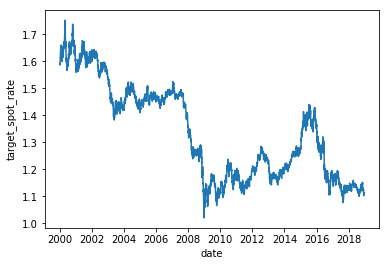

In [7]:
import seaborn as sns

single_value = df[(df['base_currency']=='GBP') & (df['target_currency']=='Euro')]
single_value.shape

sns.lineplot(x='date', y='target_spot_rate', data=single_value)